In [138]:
import numpy as np
from scipy import signal
import pickle as pk
import os
try:
    import sportran as st
except ImportError:
    from sys import path
    path.append('..')
    import sportran as st
from sportran import md
import time
import matplotlib.pyplot as plt

In [139]:
root='spce/'
if os.path.exists(root + 'enk.npy'):
    enka=np.load(root + 'enk.npy')
else:
    with open(root + 'enk.pkl', 'rb') as f:
        enk = pk.load(f)
    print(root+'enk.pkl'+'loaded correctly')
    np.save(root+'enk.npy', np.array(enk))
    enk=0
    enka=np.load(root + 'enk.npy')

In [140]:
print('list transformed in np.array')
wcepstrum = []
swcepstrum = []
print('start loop up to nk')
k=5
start = time.time()
f = open(root + 'enk{}.dat'.format(k), 'w')
f.write('c_enk[1] c_enk[2]\n')
for i in enka[:, k]:
    f.write('{} {}\n'.format(np.real(i), np.imag(i)))
f.close()


print('0', start - time.time())

jfile = st.i_o.TableFile(root + 'enk{}.dat'.format(k), group_vectors=True)

jfile.read_datalines(start_step=0, NSTEPS=0, select_ckeys=['enk'])

DT_FS = 1

j = st.Current([jfile.data['enk']], DT_FS=DT_FS,
               KAPPA_SCALE=1)
fstar_THz=j.Nyquist_f_THz/4
jf=j.resample(fstar_THz=fstar_THz)
print(j.Nyquist_f_THz)
os.remove(root + 'enk{}.dat'.format(k))
from modules import computenltt
g=computenltt.Ggeneratemodall(500, [46.595655, 46.595655, 46.595655])


list transformed in np.array
start loop up to nk
0 -0.981086015701294
c_enk[1] c_enk[2]
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  90002
  ckey =  [('enk', array([0, 1]))]
  ( 90002 ) steps read.
DONE.  Elapsed time:  0.6013500690460205 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =     125.00000 THz
 Sampling time         TSKIP =             4 steps
                             =         4.000 fs
 Original  n. of frequencies =         45002
 Resampled n. of frequencies =         11251
 min(PSD)          (pre-filter&sample) =     15.45903
 min(PSD)         (post-filter&sample) =     49.00820
 % of original PSD Power f<f* (pre-filter&sample)  = 39.254 %
 fPSD not calculate

<IPython.core.display.Javascript object>


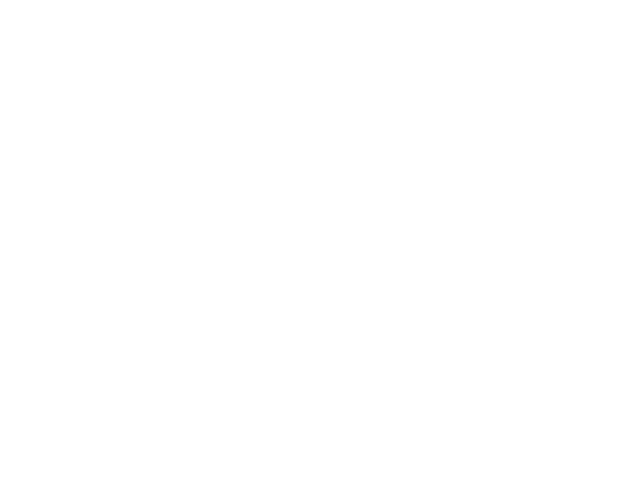

In [141]:
f = plt.figure()
ax = plt.plot(j.timeseries(), j.traj);

<IPython.core.display.Javascript object>


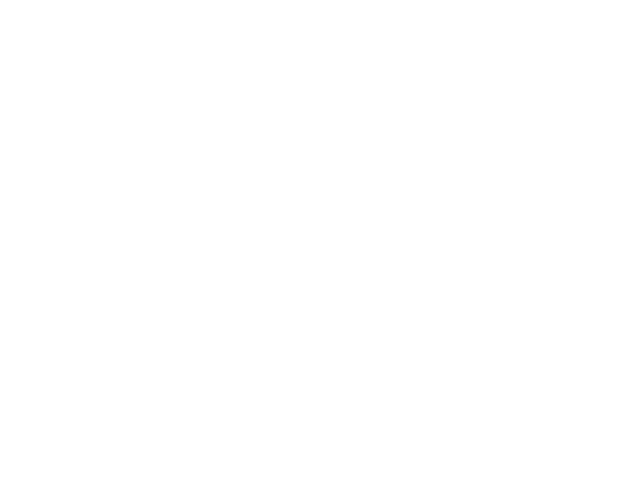

<IPython.core.display.Javascript object>


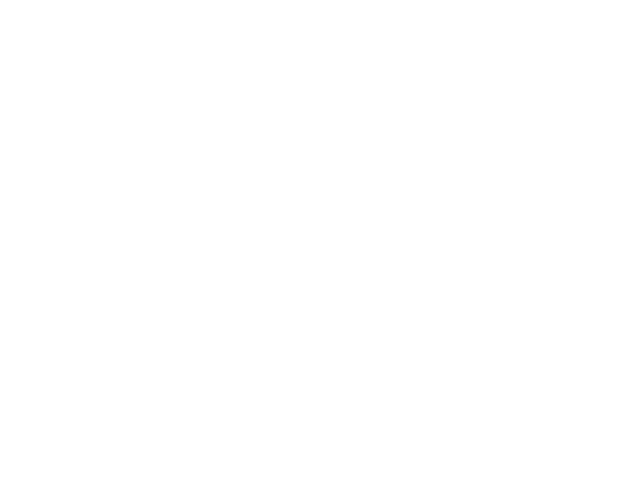

In [142]:
ax = j.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)
ax = jf.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)

In [143]:
j.cepstral_analysis()
jf.cepstral_analysis()

-----------------------------------------------------
  CEPSTRAL ANALYSIS
-----------------------------------------------------
  AIC_Kmin  = 6  (P* = 7, corr_factor = 1.000000)
  L_0*   =           9.050829 +/-   0.013650
  S_0*   =       15184.715156 +/- 207.264490
-----------------------------------------------------
  kappa* =        7592.357578 +/- 103.632245  
-----------------------------------------------------

-----------------------------------------------------
  CEPSTRAL ANALYSIS
-----------------------------------------------------
  AIC_Kmin  = 3  (P* = 4, corr_factor = 1.000000)
  L_0*   =           9.080760 +/-   0.020032
  S_0*   =       15646.073654 +/- 313.426554
-----------------------------------------------------
  kappa* =        7823.036827 +/- 156.713277  
-----------------------------------------------------



In [144]:
j.dct.tau,j.dct.tau_THEORY_std

(array([5.09988070e+07, 1.08734242e+04, 1.27162772e+04, ...,
        3.96862799e+04, 3.98399401e+04, 3.98706167e+04]),
 array([1.93066353e+05, 7.12973739e+01, 1.07644431e+02, ...,
        4.50718942e+04, 4.52469095e+04, 4.52820010e+04]))

In [145]:
j.dct.tau_Kmin

15184.71515618547

<IPython.core.display.Javascript object>


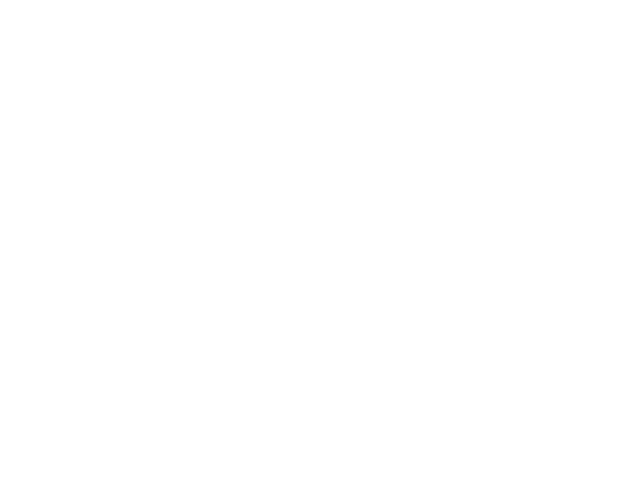

(1.0, 50.0)

In [146]:
%matplotlib notebook 
plt.fill_between(range(len(j.dct.tau))[1:50],(j.dct.tau+j.dct.tau_THEORY_std)[1:50],
                 (j.dct.tau-j.dct.tau_THEORY_std)[1:50], alpha=0.4)
plt.plot(range(len(j.dct.tau))[1:50],(j.dct.tau)[1:50],marker='o')
plt.xlim(1,50)
#plt.ylim(2000,20000)

<IPython.core.display.Javascript object>


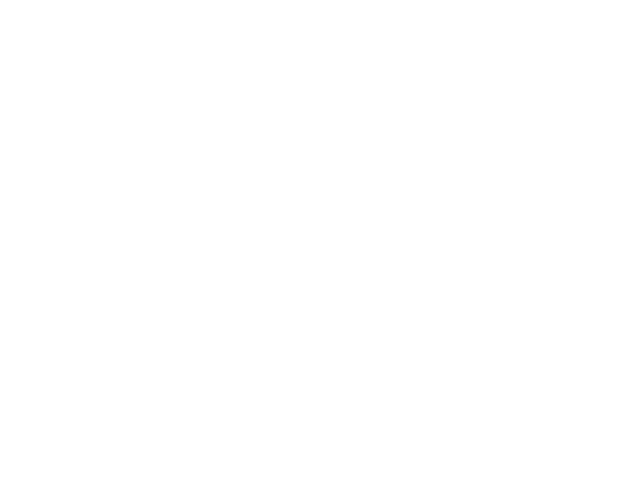

(1.0, 50.0)

In [147]:
%matplotlib notebook 
plt.fill_between(range(len(jf.dct.tau))[1:50],(jf.dct.tau+jf.dct.tau_THEORY_std)[1:50],
                 (jf.dct.tau-jf.dct.tau_THEORY_std)[1:50], alpha=0.4)
plt.plot(range(len(jf.dct.tau))[1:50],(jf.dct.tau)[1:50],marker='o')
plt.xlim(1,50)
#plt.ylim(2000,20000)

In [148]:
j.compute_acf()

<IPython.core.display.Javascript object>


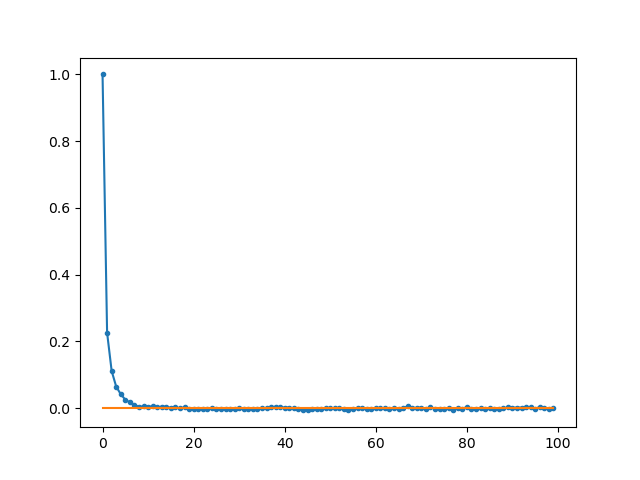

15152.457257021588

In [149]:
%matplotlib notebook 
plt.plot(j.acfm[:100]/j.acfm[0], marker='.')
plt.plot(np.zeros(100))
j.acfm[0]*2

In [150]:
fac= 68.296*10125/(6.022e23 * 46.595655**3 *1.0e-30)
dt= 0.0005*600


In [151]:
j.acfm[0]/(jf.dct.tau_Kmin*(g[k]*2*np.pi)**2)*fac / dt * (1e-10) ** 2 / 1e-12, j.dct.tau_std_Kmin/j.dct.tau_Kmin*j.acfm[0]/(jf.dct.tau_Kmin*(g[k]*2*np.pi)**2)*fac / dt * (1e-10) ** 2 / 1e-12

(0.4030223141333222, 0.005501072202579673)

In [152]:
np.var(enka[:,k])/2, j.acfm[0]

(7576.228628510796, 7576.228628510794)

In [153]:

chi=0.5*np.real(enka[:,k])**2+0.5*np.imag(enka[:,k])**2-np.mean(0.5*np.real(enka[:,k])+0.5*np.imag(enka[:,k]))**2
np.mean(chi), np.mean(enka[:,k]*np.conj(enka[:,k]))/2

(7576.2824176620725, (7576.477353382154+0j))

In [154]:
from modules import computestaticresponse

In [155]:
v,b=computestaticresponse.stdblock(chi)

<IPython.core.display.Javascript object>


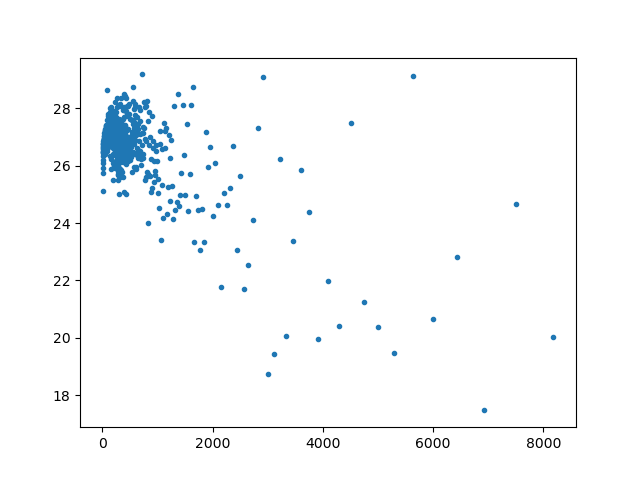

0.0034235953346761516

In [156]:
f= plt.figure()
ax = plt.scatter(b,np.sqrt(v), marker='.')
np.sqrt(v[int(15/20*len(v))])/(np.mean(chi))